In [1]:
!wget --no-check-certificate https://drive.google.com/uc?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo -O weight-height.csv

--2025-03-10 15:15:00--  https://drive.google.com/uc?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo
Resolving drive.google.com (drive.google.com)... 173.194.194.101, 173.194.194.100, 173.194.194.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.194.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo [following]
--2025-03-10 15:15:01--  https://drive.usercontent.google.com/download?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.145.132, 2607:f8b0:4001:c1e::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.145.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428120 (418K) [application/octet-stream]
Saving to: ‘weight-height.csv’

weight-height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.004s  

2025-03-10 15:15:03 (101 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Weight-Height dataset
df = pd.read_csv('weight-height.csv')

# Display the first few rows of the dataset
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


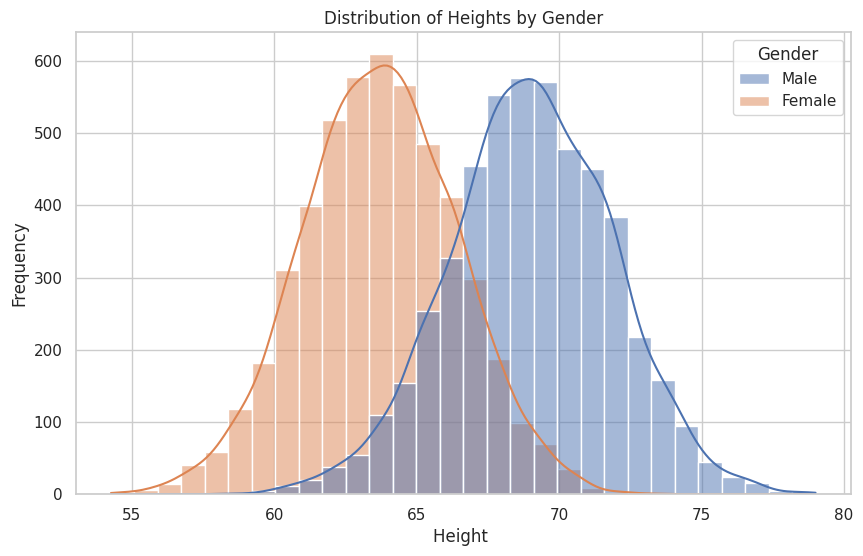

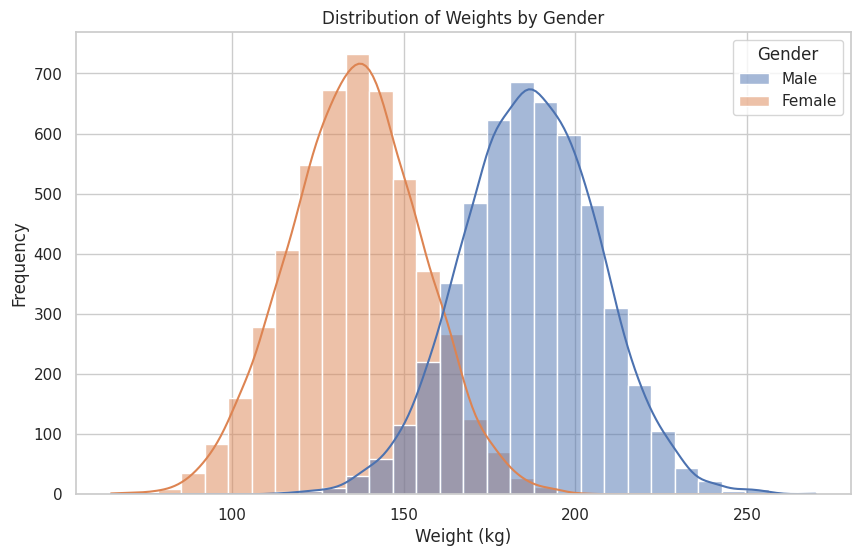

In [4]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot distribution of heights by gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Height', hue='Gender', kde=True, bins=30)
plt.title('Distribution of Heights by Gender')
plt.xlabel('Height ')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of weights by gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Weight', hue='Gender', kde=True, bins=30)
plt.title('Distribution of Weights by Gender')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

In [5]:
df["Height"].mean() # population mean

66.36755975482124

In [6]:
import numpy as np
np.random.seed(42)

# Define population size
population_size = len(df)

# Define sample size (e.g., 10% of the population)
sample_size = int(0.1 * population_size)

# Randomly sample without replacement
sample_df = df.sample(n=sample_size, random_state=42)

# Display the sample
sample_df.head()

,Gender,Height,Weight
6252,Female,68.687232,173.115813
4684,Male,68.829334,195.162042
1731,Male,66.398128,170.217451
4742,Male,71.929340,215.049660
4521,Male,67.042903,182.721452


In [7]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 6252 to 7713
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  1000 non-null   object 
 1   Height  1000 non-null   float64
 2   Weight  1000 non-null   float64
dtypes: float64(2), object(1)
memory usage: 31.2+ KB


In [8]:
population_mean_height = df['Height'].mean()
population_mean_weight = df['Weight'].mean()

# Calculate sample statistics
sample_mean_height = sample_df['Height'].mean()
sample_mean_weight = sample_df['Weight'].mean()

# Display the results
comparison_df = pd.DataFrame({
    'Statistic': ['Mean Height (cm)', 'Mean Weight (kg)'],
    'Population': [population_mean_height, population_mean_weight],
    'Sample': [sample_mean_height, sample_mean_weight]
})

comparison_df

,Statistic,Population,Sample
0,Mean Height (cm),66.367560,66.367945
1,Mean Weight (kg),161.440357,161.086441


In [9]:

sample_mean_height = sample_df['Height'].mean()
sample_variance_height = sample_df['Height'].var()
sample_std_height = sample_df['Height'].std()

# Calculate sample statistics for Weight
sample_mean_weight = sample_df['Weight'].mean()
sample_variance_weight = sample_df['Weight'].var()
sample_std_weight = sample_df['Weight'].std()

# Create a DataFrame to display the sample statistics
sample_stats = pd.DataFrame({
    'Statistic': ['Mean', 'Variance', 'Standard Deviation'],
    'Height': [sample_mean_height, sample_variance_height, sample_std_height],
    'Weight': [sample_mean_weight, sample_variance_weight, sample_std_weight]
})

sample_stats

,Statistic,Height,Weight
0,Mean,66.367945,161.086441
1,Variance,14.655280,1027.816083
2,Standard Deviation,3.828221,32.059571


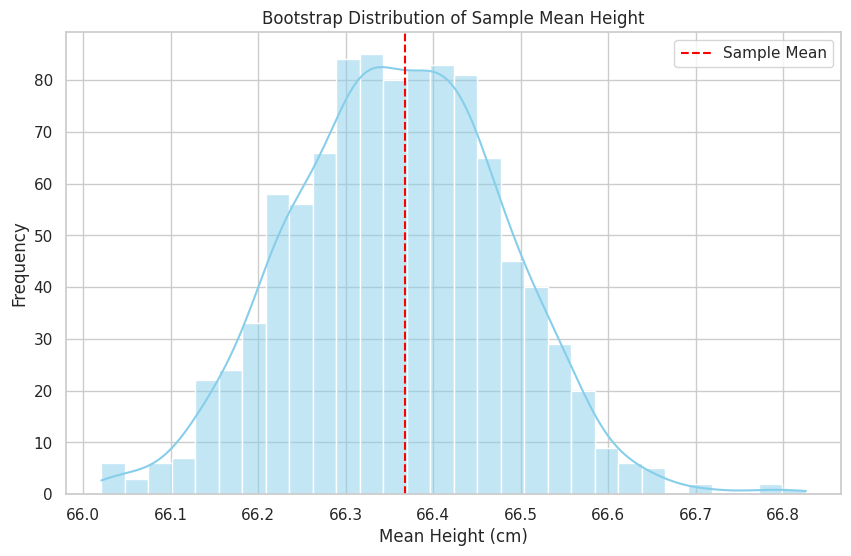

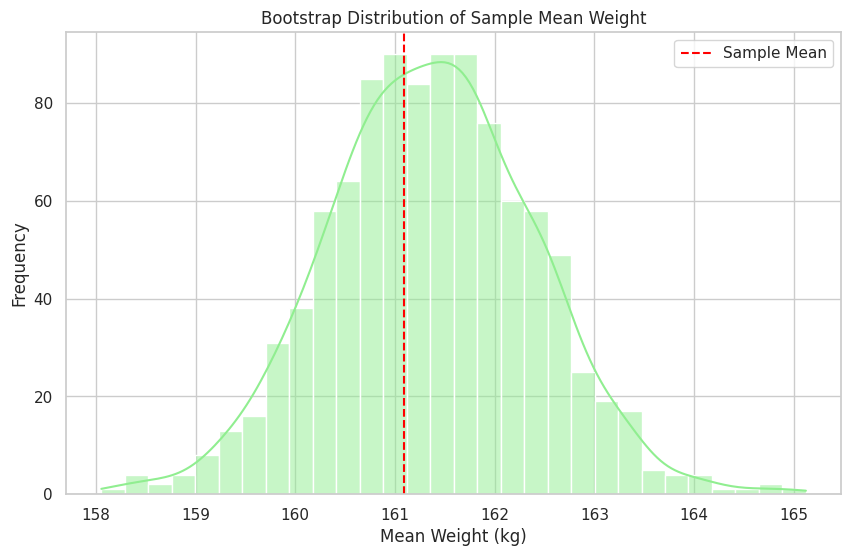

In [10]:
# Number of bootstrap samples
num_bootstrap = 1000
n = 1000
# Initialize lists to store bootstrap sample means
bootstrap_means_height = []
bootstrap_means_weight = []

# Perform bootstrap sampling
for _ in range(num_bootstrap):
    bootstrap_sample = df.sample(n=n, replace=True) # 10000
    bootstrap_means_height.append(bootstrap_sample['Height'].mean())
    bootstrap_means_weight.append(bootstrap_sample['Weight'].mean())

# Convert lists to Series
bootstrap_means_height = pd.Series(bootstrap_means_height)
bootstrap_means_weight = pd.Series(bootstrap_means_weight)

# Plot bootstrap distribution for Height
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means_height, kde=True, color='skyblue', bins=30)
plt.axvline(sample_mean_height, color='red', linestyle='--', label='Sample Mean')
plt.title('Bootstrap Distribution of Sample Mean Height')
plt.xlabel('Mean Height (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot bootstrap distribution for Weight
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means_weight, kde=True, color='lightgreen', bins=30)
plt.axvline(sample_mean_weight, color='red', linestyle='--', label='Sample Mean')
plt.title('Bootstrap Distribution of Sample Mean Weight')
plt.xlabel('Mean Weight (kg)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [11]:
#  Bootstrapped Standard deviation of sample means (standard error)
bootstrap_means_height.std()

0.12027994966085401

In [12]:
# standard deviation from s/sqrt(n)
sample_std_height/np.sqrt(n)

0.12105899235944935

In [13]:
n = 1000
bootstrap_sample = df.sample(n=n, replace=True) # 10000
heght_mean= bootstrap_sample['Height'].mean()
weight_mean = bootstrap_sample['Weight'].mean()
print("Sample height mean:", heght_mean)
print("Sample weight  mean:", weight_mean)

Sample height mean: 66.3782347090277
Sample weight  mean: 162.21624541338062


In [14]:
# Import additional libraries if not already imported
import numpy as np

# Define parameters for the simulation
num_samples = 1000  # Number of samples to draw
sample_size = 30    # Size of each sample

# Initialize lists to store sample means
sample_means_height = []
sample_means_weight = []

# Perform the sampling
for _ in range(num_samples):
    # Randomly sample 'sample_size' observations without replacement
    sample = df.sample(n=sample_size, replace=False)
    # Calculate the mean of Height and Weight
    mean_height = sample['Height'].mean()
    mean_weight = sample['Weight'].mean()
    # Append to the lists
    sample_means_height.append(mean_height)
    sample_means_weight.append(mean_weight)

# Convert lists to pandas Series for easy handling
sample_means_height = pd.Series(sample_means_height)
sample_means_weight = pd.Series(sample_means_weight)

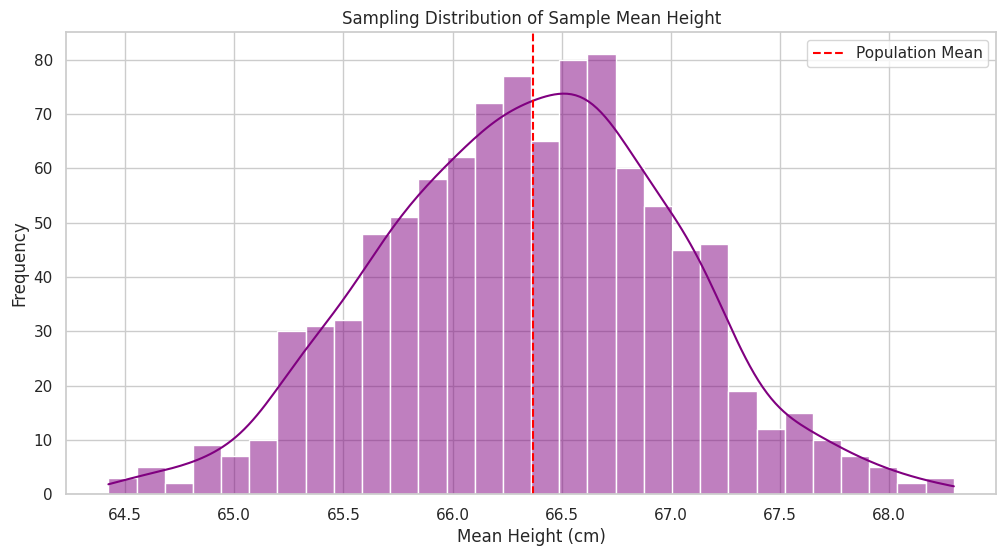

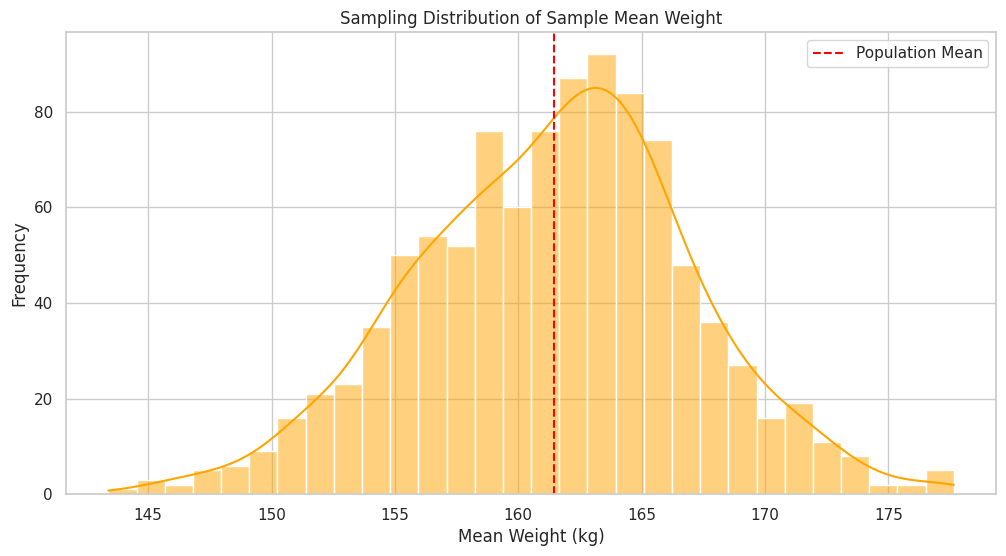

In [15]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot the sampling distribution for Mean Height
plt.figure(figsize=(12, 6))
sns.histplot(sample_means_height, kde=True, color='purple', bins=30)
plt.title('Sampling Distribution of Sample Mean Height')
plt.xlabel('Mean Height (cm)')
plt.ylabel('Frequency')
plt.axvline(df["Height"].mean(), color='red', linestyle='--', label='Population Mean')
plt.legend()
plt.show()

# Plot the sampling distribution for Mean Weight
plt.figure(figsize=(12, 6))
sns.histplot(sample_means_weight, kde=True, color='orange', bins=30)
plt.title('Sampling Distribution of Sample Mean Weight')
plt.xlabel('Mean Weight (kg)')
plt.ylabel('Frequency')
plt.axvline(df["Weight"].mean(), color='red', linestyle='--', label='Population Mean')
plt.legend()
plt.show()

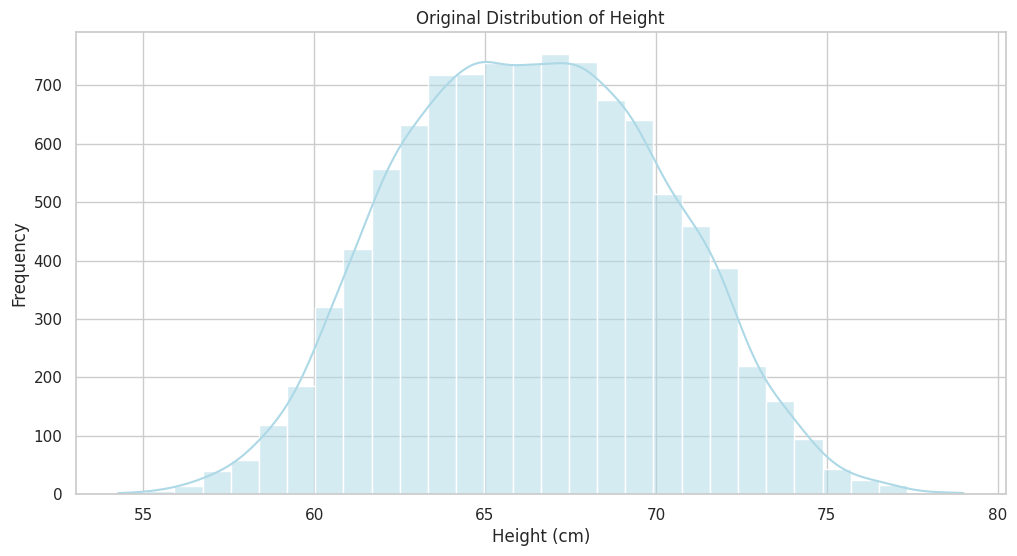

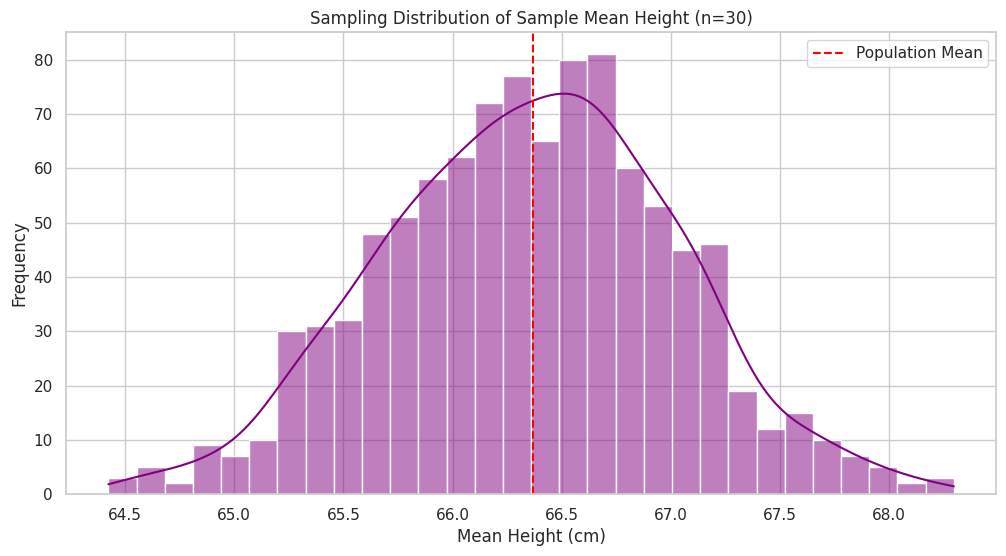

In [16]:
# Plot original distribution of Height
plt.figure(figsize=(12, 6))
sns.histplot(df['Height'], kde=True, color='lightblue', bins=30)
plt.title('Original Distribution of Height')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

# Plot sampling distribution of sample mean Height
plt.figure(figsize=(12, 6))
sns.histplot(sample_means_height, kde=True, color='purple', bins=30)
plt.title('Sampling Distribution of Sample Mean Height (n=30)')
plt.xlabel('Mean Height (cm)')
plt.ylabel('Frequency')
plt.axvline(df["Height"].mean(), color='red', linestyle='--', label='Population Mean')
plt.legend()
plt.show()

In [30]:
# Define sample size
n = len(sample_df)

# Calculate Standard Error for Height
se_height = sample_std_height / np.sqrt(n)

# Calculate Standard Error for Weight
se_weight = sample_std_weight / np.sqrt(n)

# Create a DataFrame to display the Standard Errors
standard_errors = pd.DataFrame({
    'Statistic': ['Standard Error'],
    'Height': [se_height],
    'Weight': [se_weight]
})

In [31]:
# Define confidence level
confidence_level = 0.95

# Calculate the z-score for the given confidence level
# For 95% CI, z-score is approximately 1.96
from scipy import stats

z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate Confidence Interval for Mean Height
ci_mean_height_lower = sample_mean_height - z_score * se_height
ci_mean_height_upper = sample_mean_height + z_score * se_height

# Calculate Confidence Interval for Mean Weight
ci_mean_weight_lower = sample_mean_weight - z_score * se_weight
ci_mean_weight_upper = sample_mean_weight + z_score * se_weight

# Create a DataFrame to display the Confidence Intervals
confidence_intervals = pd.DataFrame({
    'Statistic': ['Mean Height', 'Mean Weight'],
    'Lower Bound': [ci_mean_height_lower, ci_mean_weight_lower],
    'Upper Bound': [ci_mean_height_upper, ci_mean_weight_upper]
})

# Format the numerical values to two decimal places
confidence_intervals['Lower Bound'] = confidence_intervals['Lower Bound'].map('{:.2f}'.format)
confidence_intervals['Upper Bound'] = confidence_intervals['Upper Bound'].map('{:.2f}'.format)

confidence_intervals

,Statistic,Lower Bound,Upper Bound
0,Mean Height,66.13,66.61
1,Mean Weight,159.10,163.07


In [18]:
from scipy import stats
stats.norm.pdf(5.7, 5.7, 0.1)

3.989422804014327

In [19]:
stats.norm.cdf(5.7, 5.7, 0.1)

0.5

In [22]:
stats.norm.ppf(0.5, 5.7, 0.1)

5.7

In [23]:
stats.norm.ppf(0.025, 5.7, 0.1)

5.504003601545994

In [24]:
stats.norm.ppf(0.975, 5.7, 0.1)

5.895996398454006

In [25]:
stats.norm.ppf(0.025, 0, 1)

-1.9599639845400545

In [26]:
stats.norm.ppf( 0.975,0,1)

1.959963984540054

In [27]:
stats.norm.ppf(0.05)

-1.6448536269514729

In [28]:
stats.norm.ppf(0.95)

1.6448536269514722